# Bidirectional LSTM-based sentiment classification model

Building a simple Bidirectional LSTM-based model to predict sentiment on the same data as in [Sentiment classification with RNN](sentiment_rnn.ipynb).

In [ ]:
raise SystemExit("Stop right there!");

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Warnings
import warnings

# System
import os

# Mathematical operations and data manipulation
import numpy as np

# Modelling
import tensorflow as tf
import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# Statistics
from sklearn.metrics import accuracy_score

# Plotting
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline
warnings.filterwarnings("ignore")
display(HTML("<style>.container {width:80% !important;}</style>"))

print("Tensorflow version:", tf.__version__)
print("Keras version:", keras.__version__)

Tensorflow version: 2.4.1
Keras version: 2.4.3


In [2]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

<a id="set-paths"></a>
## Set paths

In [3]:
# Path to datasets directory
data_path = "datasets"
# Path to assets directory (for saving results to)
assets_path = "assets"

<a id="loading-data"></a>
## Loading dataset

In [4]:
vocab_size = 8000
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(
    num_words=vocab_size
)

In [5]:
print(type(X_train))
print(type(X_train[5]))
print(X_train[5])

<class 'numpy.ndarray'>
<class 'list'>
[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


<a id="prepare"></a>
## Preparing the data

In [6]:
# Preparing the data for stock price prediction
maxlen = 200

X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

In [7]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24 

<a id="base"></a>
## Bidirectional LSTM based model

In [8]:
# Reproducability
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
# Training base model (requires numpy=1.19,
# see https://github.com/tensorflow/models/issues/9706)
model = tf.keras.Sequential(
    [
        layers.Embedding(vocab_size, output_dim=32),
        layers.SpatialDropout1D(0.4),
        layers.Bidirectional(LSTM(32)),
        layers.Dropout(0.4),
        layers.Dense(1, activation="sigmoid"),
    ]
)

In [10]:
model.compile(
    loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          256000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 32)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 272,705
Trainable params: 272,705
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    X_train, y_train, batch_size=128, validation_split=0.2, epochs=4
)

Epoch 1/4
157/157 [==============================] - 94s 588ms/step - loss: 0.6407 - accuracy: 0.6050 - val_loss: 0.3583 - val_accuracy: 0.8646
Epoch 2/4
157/157 [==============================] - 115s 735ms/step - loss: 0.3462 - accuracy: 0.8624 - val_loss: 0.3003 - val_accuracy: 0.8778
Epoch 3/4
157/157 [==============================] - 115s 732ms/step - loss: 0.2705 - accuracy: 0.8973 - val_loss: 0.2919 - val_accuracy: 0.8764
Epoch 4/4
157/157 [==============================] - 106s 676ms/step - loss: 0.2431 - accuracy: 0.9088 - val_loss: 0.2835 - val_accuracy: 0.8878


<a id="statistics"></a>
## Statistics

In [13]:
y_test_pred = model.predict_classes(X_test)

In [14]:
print(accuracy_score(y_test, y_test_pred))

0.87796


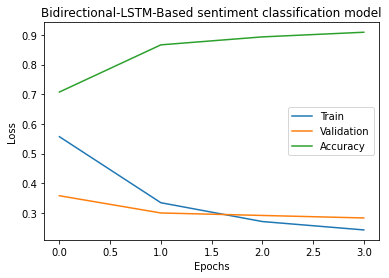

In [15]:
def plotloss(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.plot(history.history["accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train", "Validation", "Accuracy"])
    plt.title("Bidirectional-LSTM-Based sentiment classification model")
    plt.savefig(f"{assets_path}/sentiment_bi_lstm.png", format="png", dpi=300)
    plt.show()


plotloss(history)

<a id="predictions"></a>
## Predictions

In [16]:
my_review = "An excellent movie!"
# Tokenizing, normalizing case, and removing punctuation
# (keras utility)
text_to_word_sequence(my_review)
# The vocabulary and the term-to-index mapping can be loaded
# using the get_word_index method from the imdb module
# (that was employed to load the code).
word_map = imdb.get_word_index()
# The data was loaded with a vocabulary size of 8000
# (using the first 8000 indices from the mapping).
# Using the same terms/indices that the training data used.
# Limiting the mapping to 8000 terms by sorting the word_map
# variable on the index and picking the first 8000 terms
vocab_map = dict(sorted(word_map.items(), key=lambda x: x[1])[:vocab_size])
# The dictionary containing the term for index mapping for the
# 8000 terms in the vocabulary.
print(vocab_map)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'br': 7, 'in': 8, 'it': 9, 'i': 10, 'this': 11, 'that': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'all': 29, 'at': 30, 'by': 31, 'an': 32, 'they': 33, 'who': 34, 'so': 35, 'from': 36, 'like': 37, 'her': 38, 'or': 39, 'just': 40, 'about': 41, "it's": 42, 'out': 43, 'has': 44, 'if': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'more': 50, 'when': 51, 'very': 52, 'up': 53, 'no': 54, 'time': 55, 'she': 56, 'even': 57, 'my': 58, 'would': 59, 'which': 60, 'only': 61, 'story': 62, 'really': 63, 'see': 64, 'their': 65, 'had': 66, 'can': 67, 'were': 68, 'me': 69, 'well': 70, 'than': 71, 'we': 72, 'much': 73, 'been': 74, 'bad': 75, 'get': 76, 'will': 77, 'do': 78, 'also': 79, 'into': 80, 'people': 81, 'other': 82, 'first': 83, 'great': 84, 'because': 85, 'how': 86, 'him': 87, 'most': 88, "don't":

In [17]:
# Function that accepts raw text, applies the text_to_word_sequence
# utility to it, performs a lookup from vocab_map, and returns
# the corresponding sequence of integers
def preprocess(review):
    inp_tokens = text_to_word_sequence(review)
    seq = []
    for token in inp_tokens:
        seq.append(vocab_map.get(token))
    return seq


print(preprocess(my_review))

[32, 318, 17]


In [18]:
print(model.predict_classes([preprocess(my_review)]))

[[1]]


The output prediction is 1 (positive)

In [19]:
my_review = "Don't watch this movie - poor acting, poor script, bad direction."
print(model.predict_classes([preprocess(my_review)]))

[[0]]


The output prediction is 0 (negative)